# Biodiversity in National Parks - Data Analysis
### Analysis Overview
In this analysis, we will be analyzing data from two datasets containing information on National Parks and the species who inhabit them.

The datasets are:

- ```"observations.csv"``` - includes data on the national park being observed, what species live their, and how many times each species has been recorded being spotted within the last 7 days.
- ```"species_info.csv"``` - includes data on a large number of different species.  It features the species' scientific name, common name, category of species, and conservation status.

---

## Section 1 - Understanding the Data
In order to work with any data, you first need to understand what you'll be working with.  

1. Import the Python libraries you'll need to conduct your analysis 
2. Load the two CSV datasets into two seperate Pandas DataFrames, ```parks``` and ```species```
3. View the first 10 rows of the ```parks``` dataframe
4. View the first 10 rows of the ```species``` dataframe

In [1403]:
# 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [1404]:
# 2

parks = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [1405]:
# 3 

parks.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [1406]:
# 4

species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


The first thing that stands out to me is in the ```species``` dataframe.  Without looking any deeper you can already see that it contains some missing values ('NaN').  In order to accurately work with this data, you'll need to clean up your dataframes.  Aside from that one column in the ```species``` dataframe, you aren't sure which columns may have missing data in either of the two dataframes, so you'll need to do some work to find out.

Let's focus on looking at your ```parks``` dataframe first!

5. Check to see if the ```parks``` dataframe contains any missing values.  Check column names and data types as well
6. Take a look at the summary statistics
7. find out how many species observations there are for each National Park 

In [1407]:
# 5

parks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [1408]:
# 6

parks.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [1409]:
# 7

parks.park_name.value_counts()

Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: park_name, dtype: int64

You can see that the length of the dataframe is 23,296 rows long and that it has 3 columns, each with 0 missing values.  The column names are clean and easy to work with and you can also see the data types of each column make sense.

Looking at the output from code block #6, you can see that there are a lot of unique species within the dataframe (5541), but only 4 diferent National Parks.    

Since there isn't a lot of unique values, you can easily use ```.value_counts()``` on the dataframe to show that there is 5824 observations of species in each National Park.  

Though our data looks seemingly nice and tidy, we could further inspect the ```scientific_name``` column to see if there are any strange values that are hidden within the column that could effect the analysis.  An example of a strange value could be an empty string ("") or a string that says ```"NULL"``` or ```"NaN"```.  These would technically count as values but they should instead be classified as a missing value.

8. Pull some random samples of the ```scientific_name``` column, look over the values, and check to see if there are any entries that don't belong
  

In [1410]:
# 8

for num in range(10):
    print(f'Sample {num + 1}')
    parks_sample = parks.scientific_name.sample(10) # sample size of 10 used to conserve space but 20-25 preferred
    print(parks_sample)
    print()

Sample 1
17225    Acer negundo var. violaceum
4378                 Pohlia elongata
23002        Potamogeton amplifolius
9518             Carex leavenworthii
22595     Viola sagittata var. ovata
21124       Caprimulgus carolinensis
10147                    Vinca major
11602              Agrostis gigantea
16294           Vaccinium corymbosum
6461               Juncus canadensis
Name: scientific_name, dtype: object

Sample 2
10277                         Phacelia purpusii
17317                            Silene oregana
21103                           Viola hirsutula
15257           Hazardia whitneyi var. whitneyi
4224                              Geum radiatum
492                          Sayornis nigricans
20483                     Menyanthes trifoliata
1929                          Lycopus uniflorus
18539                            Rana sylvatica
21851    Asplenium trichomanes ssp. trichomanes
Name: scientific_name, dtype: object

Sample 3
22442                    Dicentra cucullaria
34

According to the samples, the data is good to go!

Time to check out the ```species``` dataframe!

9. Check to see if the ```species``` dataframe contains any missing values.  Check column names and data types as well
10. Take a look at the summary statistics
11. Find out how many species there are within each ```category```
12. Find out how many species there are within each ```conservation_status```
13. Find out the number of ```NaN``` values in the ```conservation_status``` column, and the percentage

In [1411]:
# 9 

species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [1412]:
# 10

species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [1413]:
# 11

species.category.value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

In [1414]:
# 12

species.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [1415]:
# 13

nan_count = len(species[species.conservation_status.isnull() == True])
nan_percent = (len(species[species.conservation_status.isnull() == True]) / len(species)) * 100

print(f'NaN values in \'conservation_status\' column: {nan_count} out of {len(species)}')
print(f'Percentage of NaN values in \'conservation_status\' column: {round(nan_percent, 2)}%')

NaN values in 'conservation_status' column: 5633 out of 5824
Percentage of NaN values in 'conservation_status' column: 96.72%


Going through the summary statistics gives us plenty of insight into the data.  The ```conservation_status``` column is clearly missing a massive chunk of data,
96.72% actually.  But why is this data missing?  If you take a look at the unique values within the column, you can see that there are only 4 values, and all of them are associated with endangerment to some degree (output of code block #12).  With this knowledge, we can assume that the ```NaN``` values just mean that the species is not at risk of endangerment.  The values seem to be missing for a reason.

With this assumption, you can go ahead and fill in the missing values with an appropriate value.

---

# Section 2 - Cleaning the Data
Before creating any visualizations of the data, you first need to clean the data to make sure that our visualizations accurately represent what is happening within the dataset.

14. Fill in the ```NaN``` values in the ```conservation_status``` column with the string value ```"Not at risk"```

In [1416]:
# 14

species.conservation_status.fillna('Not at Risk', inplace=True)
species.conservation_status.value_counts()

Not at Risk           5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

After doing this, it wouldn't hurt to check the scientific name column for any duplicate values.  If you refer back to code block #10, you can see that the column does have some repeating values.  This should be looked into.

15. Figure out how many values are duplicates within the ```scientific_name``` column
16. Find out how many duplicate rows exist within the ```species``` dataframe, if any

In [1417]:
# 15

dup = species.scientific_name.duplicated().sum()
print(f'Duplicated values in \'scientific_name\' column: {dup}')

Duplicated values in 'scientific_name' column: 283


In [1418]:
# 16 

dup = species.duplicated().sum()
print(f'Duplicated rows in \'species\' dataframe: {dup}')

Duplicated rows in 'species' dataframe: 0


So there aren't any duplicate rows within the ```species``` dataframe, but there are 283 duplicates within the ```scientific_name``` column of the ```species``` dataframe.  This may be due to the fact that more than one person recorded the same species and they recorded different numbers observed in the ```observations``` column.  Let's find out.

17. Experiment with the ```species``` dataframe and determine if these duplicate values should be dropped or not

In [1419]:
# 17

species[species.scientific_name.duplicated()].head()

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,Not at Risk
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",Not at Risk
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",Not at Risk
3025,Mammal,Lutra canadensis,River Otter,Not at Risk


In [1420]:
# 17 (Cont.)

species[species.scientific_name == 'Canis lupus']

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


This doesn't seem right.  This is the same mammal, recorded 3 times, and once with a different conservation status.  The only sensible explanation for the repeated entries could be due to a possible change in conservation status.  If that is the case, then we can rest knowing it was recorded for a reason. 

In [1421]:
# 17 (Cont.)

species[species.scientific_name == 'Cervus elaphus']

,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not at Risk
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,Not at Risk


In [1422]:
# 17 (Cont.)

species[species.scientific_name == 'Puma concolor']

,category,scientific_name,common_names,conservation_status
16,Mammal,Puma concolor,Panther (Mountain Lion),Not at Risk
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",Not at Risk
4451,Mammal,Puma concolor,Mountain Lion,Not at Risk


Ok, no rest for us, but you can conclude that a changing conservation status is NOT the reason for the duplicate values, and this is comforting, sort of.  It is safe to assume that the duplicates within the dataframe were recorded by different people who each had slightly different common names for the species.  To accurately plot any data, you'll need to drop the duplicates since they will do nothing for you but scew your results ever so slightly.

18. Drop duplicates in the ```scientific_name``` column of the ```species``` dataframe

In [1423]:
species.drop_duplicates(subset=['scientific_name'], inplace=True)
dup = species.scientific_name.duplicated().sum()
print(f'Duplicated values in \'scientific_name\' column: {dup}')

Duplicated values in 'scientific_name' column: 0


18. Find out how many duplicate rows exist within the ```parks``` dataframe, if any
19. If so, drop the duplicated rows, you don't need any identical rows

In [1424]:
# 18

parks.duplicated().sum()

15

In [1425]:
# 19

print(f'Before dropping duplicates: {len(parks)}')
parks.drop_duplicates(inplace=True)
print(f'After dropping duplicates: {len(parks)}')

Before dropping duplicates: 23296
After dropping duplicates: 23281


20. The same ```scientific_name``` shouldn't be recorded at the same ```park_name``` more than once.  Find out how many duplicates you have when you check the duplicates between ```scientific_name``` and ```park_name```
21. There is a lot of duplicates.  Experiment with the ```parks``` dataframe and determine if these duplicate values should be dropped or not

In [1426]:
# 20

dup = parks[['scientific_name', 'park_name']].duplicated().sum()
print(f'Duplicates: {dup}')

Duplicates: 1117


In [1427]:
# 21

parks[parks[['scientific_name', 'park_name']].duplicated()]

,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone National Park,235
490,Agrostis mertensii,Yosemite National Park,128
945,Rumex crispus,Yellowstone National Park,255
1213,Dianthus barbatus,Bryce National Park,110
1259,Riparia riparia,Bryce National Park,91
...,...,...,...
23258,Microtus longicaudus,Yellowstone National Park,244
23259,Agrostis scabra,Bryce National Park,118
23267,Oxalis corniculata,Yosemite National Park,164
23273,Dactylis glomerata,Bryce National Park,89


In [1428]:
# 21 (Cont.)

parks[parks.scientific_name == 'Agrostis gigantea']

,scientific_name,park_name,observations
449,Agrostis gigantea,Yellowstone National Park,253
483,Agrostis gigantea,Yellowstone National Park,235
6824,Agrostis gigantea,Bryce National Park,104
7763,Agrostis gigantea,Great Smoky Mountains National Park,93
8676,Agrostis gigantea,Bryce National Park,116
11602,Agrostis gigantea,Great Smoky Mountains National Park,57
13907,Agrostis gigantea,Yosemite National Park,148
17535,Agrostis gigantea,Yosemite National Park,128


In [1429]:
# 21 (Cont.)

parks[parks.scientific_name == 'Oxalis corniculata']

,scientific_name,park_name,observations
415,Oxalis corniculata,Bryce National Park,92
10750,Oxalis corniculata,Bryce National Park,82
12378,Oxalis corniculata,Yosemite National Park,153
14294,Oxalis corniculata,Great Smoky Mountains National Park,91
18638,Oxalis corniculata,Yellowstone National Park,249
20252,Oxalis corniculata,Great Smoky Mountains National Park,73
21746,Oxalis corniculata,Yellowstone National Park,223
23267,Oxalis corniculata,Yosemite National Park,164


22. The duplicates should definitely be dropped, but which ones?  Some have higher ```observations``` values than others.  The best course of action would be to set the values within the observations column to the average number of observations for each duplicate ```scientific_name``` and ```park_name```.  Let's do just that

In [1430]:
# 22

duplicated_name_and_park = parks[parks[['scientific_name', 'park_name']].duplicated()].reset_index(drop=True)

for i in range(len(duplicated_name_and_park)):
    
    scientific_name = duplicated_name_and_park.scientific_name.iloc[i]
    park_name = duplicated_name_and_park.park_name.iloc[i]

    duplicate = parks[(parks.scientific_name == scientific_name) & (parks.park_name == park_name)]
    avg_observation = int(duplicate.observations.mean())

    mask = parks[(parks.scientific_name == scientific_name) & (parks.park_name == park_name)]
    
    parks.loc[mask.index, 'observations'] = avg_observation

Let's check some duplicates to make sure our conversions worked

In [1431]:
# 22 (Cont.)

parks[parks.duplicated()].head()

,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone National Park,244
490,Agrostis mertensii,Yosemite National Park,131
945,Rumex crispus,Yellowstone National Park,255
1213,Dianthus barbatus,Bryce National Park,97
1259,Riparia riparia,Bryce National Park,89


In [1432]:
# 22 (Cont.)

parks[(parks.scientific_name == 'Agrostis gigantea') & (parks.park_name == 'Yellowstone National Park')]

,scientific_name,park_name,observations
449,Agrostis gigantea,Yellowstone National Park,244
483,Agrostis gigantea,Yellowstone National Park,244


In [1433]:
# 22 (Cont.)

parks[(parks.scientific_name == 'Riparia riparia') & (parks.park_name == 'Bryce National Park')]

,scientific_name,park_name,observations
872,Riparia riparia,Bryce National Park,89
1259,Riparia riparia,Bryce National Park,89


Everything checks out!  The duplicate ```scientific_name``` and ```park_name``` values now have duplicate ```observations``` values as well, which are equal to the average of the observations between the duplicates.  Now we can simply just drop the duplicate rows of the dataframe since they are equal.

23. Now that the values have been correctly updated, you can drop the duplicates

In [1434]:
# 23

print(f'Number of duplicates: {parks.duplicated().sum()}')

before = len(parks)
print(f'Length before dropping duplicates: {before}')

parks.drop_duplicates(inplace=True)

after = len(parks)
print(f'Length after dropping duplicates: {after}')

print(f'Difference between before and after: {before} - {after} = {before - after} duplicates dropped')
print(f'Duplicates in dataframe: {parks.duplicated().sum()}')

dup = parks[['scientific_name', 'park_name']].duplicated().sum()
print(f'Duplicates between \'scientific_name\' and \'park_name\' columns: {dup}')

Number of duplicates: 1117
Length before dropping duplicates: 23281
Length after dropping duplicates: 22164
Difference between before and after: 23281 - 22164 = 1117 duplicates dropped
Duplicates in dataframe: 0
Duplicates between 'scientific_name' and 'park_name' columns: 0


Perfect!  Now the ```parks``` dataframe contains each species number of observations ONCE per park.

The ```species``` and ```parks``` dataframes cleaned up and ready for further analysis!

24. Do a final summary statistics check on the ```species``` dataframe
25. Do a final summary statistics check on the ```parks``` dataframe

In [1435]:
# 24

species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  5541 non-null   object
dtypes: object(4)
memory usage: 216.4+ KB


In [1436]:
# 24 (Cont.)

species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5541,5541,5541,5541
unique,7,5541,5229,5
top,Vascular Plant,Clethrionomys gapperi gapperi,Brachythecium Moss,Not at Risk
freq,4262,1,7,5363


In [1437]:
# 25

parks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  22164 non-null  object
 1   park_name        22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 692.6+ KB


In [1438]:
# 25 (Cont.)

parks.describe(include='all')

,scientific_name,park_name,observations
count,22164,22164,22164.000000
unique,5541,4,NaN
top,Vicia benghalensis,Great Smoky Mountains National Park,NaN
freq,4,5541,NaN
mean,NaN,NaN,142.302472
std,NaN,NaN,69.806198
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


The dataframes look great!  Each dataframe contains 0 null values and 5541 unique values for the ```scientific_name``` column.  The only time there will be a duplicate ```scientific_name``` value in the ```parks``` dataframe is when the scientific name corresponds to a different ```park_name``` value.  Therefore, since there are four unique ```park_name``` values, there can be a maximum of four identical ```scientific_name``` values corresponding to a different unique ```park_name``` value with each occurance.

The final step you need to take before looking further into the data is to merge the two dataframes.  This will make plotting our findings much easier.

26. Merge the ```species``` and ```parks``` dataframes by inner merging ```species``` onto ```parks```

In [1439]:
# 26

parks_species = parks.merge(species)

In [1440]:
# 26

parks_species.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not at Risk
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not at Risk
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not at Risk
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not at Risk
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not at Risk


By inner merging ```species``` onto ```parks```, the dataframe merges on the common columns, which in this case, was the ```scientific_name``` column.  

Time to move into further exploration of the data!

---

# Section 3 - Exploring the Data - Part 1
### _Conservation Statuses within Different Parks_
With a \'tidy\' pair of dataframes, you can now dive into deeper exploration of the data.

In this analysis, you want to find out if there are any common factors amongst endangered species in order to prevent other species becoming endangered in the future.  For this section, the focus will be on the observations of different conservation statuses within different parks.

27. Find out which parks have the highest amount of \'Not at Risk\' species
28. Look at the total observations for all ```conservation_status``` values within every park

In [1441]:
# 27

not_at_risk = parks_species[parks_species.conservation_status == 'Not at Risk']

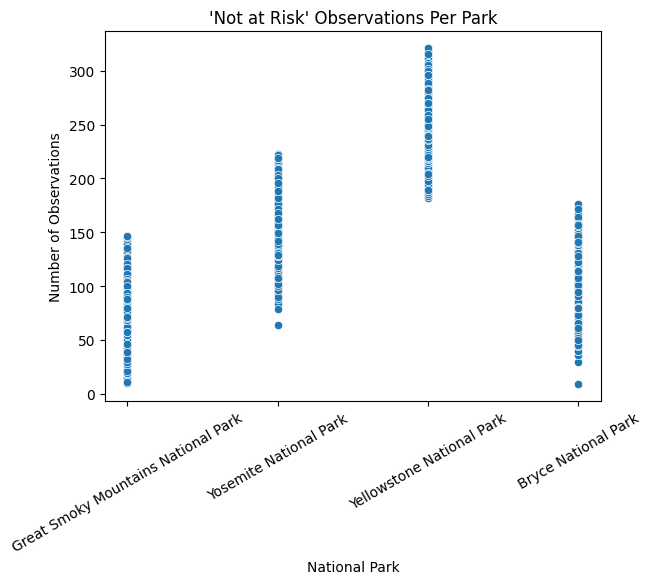

<Figure size 640x480 with 0 Axes>

In [1442]:
# 27

sns.scatterplot(data=not_at_risk, x='park_name', y='observations')
ax = plt.subplot()
ax.set_xticks(range(len(not_at_risk.park_name.unique())))
ax.set_xticklabels(not_at_risk.park_name.unique(), rotation=30)
plt.title('\'Not at Risk\' Observations Per Park')
plt.xlabel('National Park')
plt.ylabel('Number of Observations')
plt.show()
plt.clf()

You can see that the highest number of 'Not at Risk' species observations is in Yellowstone National Park.  This chart is really just for curiousity because this doesn't necessarily mean that Yellowstone is a 'safer' park for a particular species.  This could be for a variety of reasons such as the park could being larger than the other parks or the park having a larger species population, etc.

In [1443]:
# 28

observations_per_park = parks_species.groupby(['park_name', 'conservation_status']).observations.sum().reset_index()

In [1444]:
# 28 (Cont.)

observations_per_park_pivot = observations_per_park.pivot(
  index='park_name',
  columns='conservation_status',
  values='observations'
)

In [1445]:
# 28 (Cont.)

observations_per_park_pivot

conservation_status,Endangered,In Recovery,Not at Risk,Species of Concern,Threatened
park_name,,,,,
Bryce National Park,402,258,533093,13979,427
Great Smoky Mountains National Park,294,189,400343,9659,340
Yellowstone National Park,1008,559,1337313,33569,1087
Yosemite National Park,616,386,799611,20187,672


In [1446]:
# 28 (Cont.)

# Using .sum() and specifying axis 1 will add up all the values across the rows instead of down the columns

observations_per_park_pivot.sum(axis=1)

park_name
Bryce National Park                     548159
Great Smoky Mountains National Park     410825
Yellowstone National Park              1373536
Yosemite National Park                  821472
dtype: int64

Now that you have a pivot table, you can see the total population for every conservation status in every national park.  In order to learn more from the pivot table, you can calculate the total observations for every conservation status and then find the percentages of the different conservation statuses within each park.

You don't just want to make calculations, it would be nice to save the calculations into a variable as well.  You can update the entire pivot table into percentages but this would alter the currrent pivot table.  To avoid this, create a new variable and use the ```.copy()``` method to make a copy of the original pivot table.  If you don't use the ```.copy()``` method, then any alterations applied to the new pivot table variable will also apply to the original, though it is not directly referenced. 

29. Create a copy of the original pivot table using ```.copy()```
30. Update the new pivot table variable with percentages for every conservation status in each park

In [1447]:
# 29

observations_per_park_pivot_percent = observations_per_park_pivot.copy()

In [1448]:
# 30

bryce_park_total = [observations_per_park_pivot.sum(axis=1).index[0], observations_per_park_pivot.sum(axis=1)[0]]
smokies_park_total = [observations_per_park_pivot.sum(axis=1).index[1], observations_per_park_pivot.sum(axis=1)[1]]
yellowstone_park_total = [observations_per_park_pivot.sum(axis=1).index[2], observations_per_park_pivot.sum(axis=1)[2]]
yosemite_park_total = [observations_per_park_pivot.sum(axis=1).index[3], observations_per_park_pivot.sum(axis=1)[3]]

print(bryce_park_total)
print(smokies_park_total)
print(yellowstone_park_total)
print(yosemite_park_total)

park_list = [bryce_park_total, smokies_park_total, yellowstone_park_total, yosemite_park_total]

['Bryce National Park', 548159]
['Great Smoky Mountains National Park', 410825]
['Yellowstone National Park', 1373536]
['Yosemite National Park', 821472]


In [1449]:
# 30 (Cont.)

for i in range(len(observations_per_park_pivot_percent.index)):
    observations_per_park_pivot_percent.iloc[i] = observations_per_park_pivot_percent.iloc[i].apply(lambda x: round((x / park_list[i][1]) * 100, 3))

In [1450]:
# 30 (Cont.)

observations_per_park_pivot_percent

conservation_status,Endangered,In Recovery,Not at Risk,Species of Concern,Threatened
park_name,,,,,
Bryce National Park,0.073,0.047,97.252,2.550,0.078
Great Smoky Mountains National Park,0.072,0.046,97.449,2.351,0.083
Yellowstone National Park,0.073,0.041,97.363,2.444,0.079
Yosemite National Park,0.075,0.047,97.339,2.457,0.082


In [1451]:
# 30 (Cont.)

observations_per_park_pivot

conservation_status,Endangered,In Recovery,Not at Risk,Species of Concern,Threatened
park_name,,,,,
Bryce National Park,402,258,533093,13979,427
Great Smoky Mountains National Park,294,189,400343,9659,340
Yellowstone National Park,1008,559,1337313,33569,1087
Yosemite National Park,616,386,799611,20187,672


Now you have two seperate pivot tables, one with the number of observations per park, and one with the percentage of observations per park!

What is the takeaway from doing this though?  

Well, take a look at the pivot table directly above, with the number of observations.  It looks as if the 'safest' park for wildlife is Yellowstone.  It also looks like that is the 'most dangerous' park for wildlife as well.  It's hard to interpret what you're really looking at.  This is why you created the pivot table containing percentages instead!

Look at the pivot table above the one with the number of observations, the one that contains the decimal numbers as values (The percentages).  There is an incredibly small amount of variation between the percentages of each conservation status within each park.  

Findings:
- ```There are near equal proportions of each conservation status within each park.``` 

In the comparison of observations between conservation statuses within different parks, we can conclude that they are relatively equal.  The good thing is, there are other columns of data to still explore, and you have learned something important about the data that can be used moving forward.

---

# Section 3 - Exploring the Data - Part 2
### _The Purpose of Cleaning Data_
Before exploring any further, you want to go through the importance of why data needs to be cleaned by visualizing some graphs/charts.

For the remainder of the analysis you'll use a dataframe that excludes the 'Not at Risk' ```conservation_status```.  This is due to the fact that the proportion of species that are 'Not at Risk' exceeds the other ```conservation_status``` values by so much that the graphs/charts can't be read.  This is fine, as long as we understand the actual proportions of the data with the 'Not at Risk' values included.

31. An example of keeping the 'Not at Risk' values in your graphs/charts
32. Create dataframe that excludes the 'Not at Risk' values

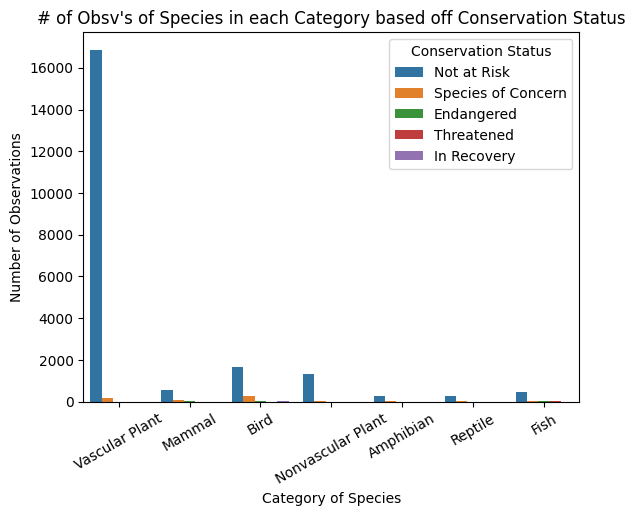

<Figure size 640x480 with 0 Axes>

In [1452]:
# 31

sns.countplot(data=parks_species, x='category', hue='conservation_status')
ax = plt.subplot()
ax.set_xticks(range(len(parks_species.category.unique())))
ax.set_xticklabels(parks_species.category.unique(), rotation=30)
plt.title('# of Obsv\'s of Species in each Category based off Conservation Status')
plt.ylabel('Number of Observations')
plt.xlabel('Category of Species')
plt.legend(title='Conservation Status')
plt.show()
plt.clf()

Not much to see here!  Let's fix that!

In [1453]:
# 32

pk_sp_nar_excluded = parks_species[parks_species.conservation_status != 'Not at Risk']
pk_sp_nar_included = parks_species[parks_species.conservation_status == 'Not at Risk']

print(f'Length of original dataframe: {len(parks_species)}')
print(f'Length of dataframe including \'Not at Risk\' values only: {len(pk_sp_nar_included)}')
print(f'Length of dataframe excluding \'Not at Risk\': {len(pk_sp_nar_excluded)}')
print(f'Length after adding the included and excluded dataframes: {len(pk_sp_nar_excluded) + len(pk_sp_nar_included)}')


Length of original dataframe: 22164
Length of dataframe including 'Not at Risk' values only: 21452
Length of dataframe excluding 'Not at Risk': 712
Length after adding the included and excluded dataframes: 22164


In [1454]:
# 32 (Cont.)

pk_sp_nar_excluded.conservation_status.value_counts()

Species of Concern    604
Endangered             60
Threatened             36
In Recovery            12
Name: conservation_status, dtype: int64

You now have a dataframe that will be easier to plot with!  

Time for some visualizations!

33. Make a figure showing the proportions of observations for each conservation status within each park

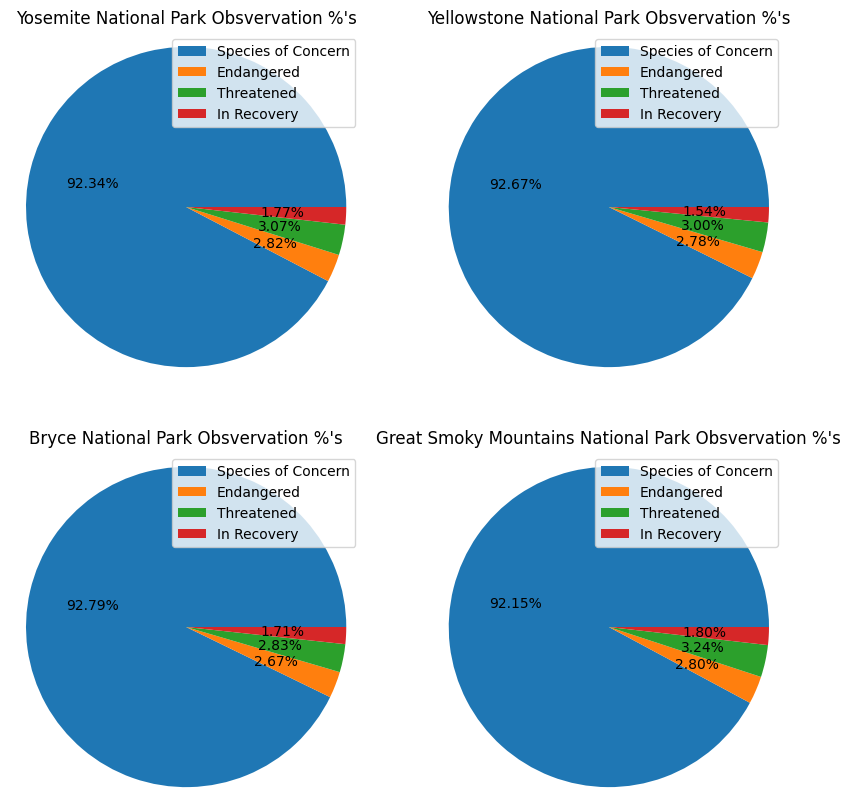

<Figure size 640x480 with 0 Axes>

In [1455]:
# 33

plt.figure(figsize=(10, 10))

for i in range(len(pk_sp_nar_excluded.park_name.unique())):
  
  park_df = pk_sp_nar_excluded[pk_sp_nar_excluded.park_name == pk_sp_nar_excluded.park_name.unique()[i]]
  park_df = park_df[['conservation_status', 'observations']]
  park_df = park_df.groupby('conservation_status', sort=False).observations.sum()
  pie_labels = park_df.index

  plt.subplot(2, 2, i + 1)
  plt.pie(park_df, autopct='%0.2f%%')
  plt.axis('equal')
  plt.title(f'{pk_sp_nar_excluded.park_name.unique()[i]} Obsvervation %\'s')
  plt.legend(pie_labels)

plt.show()
plt.clf()

In creating four separate pie charts, one for each park, you can see that the percentage of observations for each conservation status was nearly identical in each park.  This is basically the same as the pivot table earlier but without the 'Not at Risk' conservation status included.  You can see that the majority of species who are at some sort of risk, fall under the category of 'Species of Concern'.  

These pie charts are informative and provide an accurate understanding of the data, but what would these look like if the data hadn't been cleaned properly?

34. Reimport the original uncleaned datasets into new dataframe variables (So you don't alter the dataframe variables you've been working with)
35. Inner merge the two uncleaned dataframes (Merge ```dirty_species``` onto ```dirty_parks```)
36. Exclude the 'Nan' rows from the ```conservation_status``` column (Same as excluding 'Not at Risk' earlier)
37. Visualize the uncleaned cleaned dataframe

In [1456]:
# 34

dirty_parks = pd.read_csv('observations.csv')
dirty_species = pd.read_csv('species_info.csv')

In [1457]:
# 35

dirty_parks_species = dirty_parks.merge(dirty_species)

In [1458]:
# 36

dirty_parks_species = dirty_parks_species[dirty_parks_species.conservation_status.isna() == False]

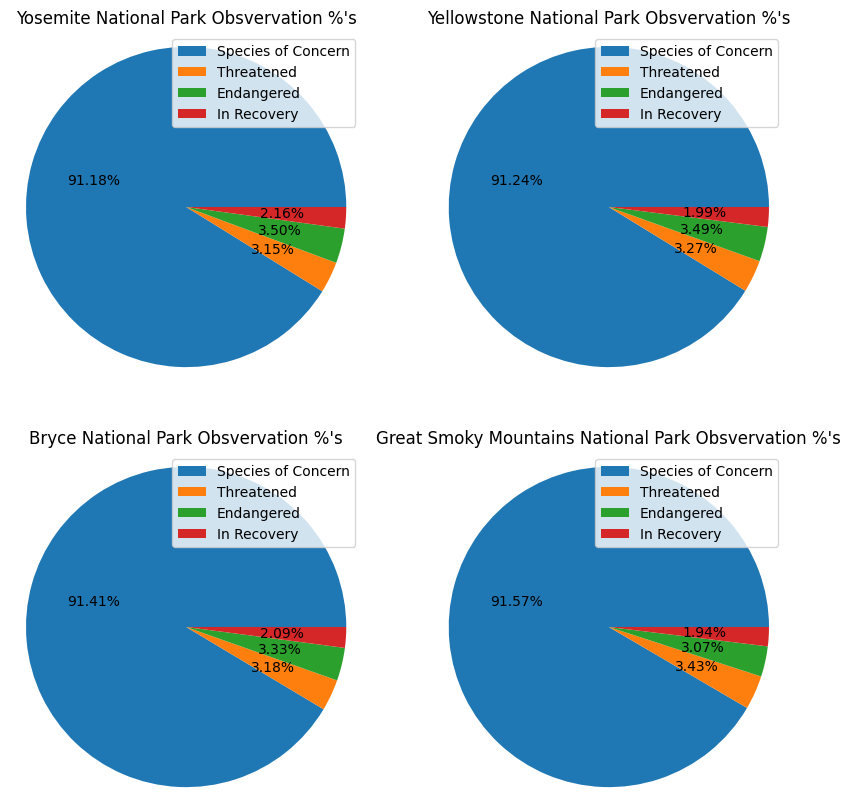

<Figure size 640x480 with 0 Axes>

In [1459]:
# 37

plt.figure(figsize=(10, 10))

for i in range(len(dirty_parks_species.park_name.unique())):
  
  dirty_park_df = dirty_parks_species[dirty_parks_species.park_name == dirty_parks_species.park_name.unique()[i]]
  dirty_park_df = dirty_park_df[['conservation_status', 'observations']]
  dirty_park_df = dirty_park_df.groupby('conservation_status', sort=False).observations.sum()
  dirty_pie_labels = dirty_park_df.index

  plt.subplot(2, 2, i + 1)
  plt.pie(dirty_park_df, autopct='%0.2f%%')
  plt.axis('equal')
  plt.title(f'{dirty_parks_species.park_name.unique()[i]} Obsvervation %\'s')
  plt.legend(dirty_pie_labels)

plt.show()
plt.clf()

When looking at these pie charts, they look very similar to the previous pie charts, but there are pretty significant differences.  By not cleaning the data beforehand, we didn't remove the duplicate observation counts (where a species was counted twice as much as it should have been).  Therefore all of the observation counts were increased, and though the proportions are relatively similar to the previous pie charts, they are inaccurate.  Let's explain further.

The total amount of observations contained within each pie chart is listed below...

### Pie charts with Clean Data:

_Yosemite National Park_ - ```21861``` total observations | ```616``` endangered | ```20187``` species of concern | ```672``` threatened | ```386``` in recovery \
_Yellowstone National Park_ - ```36223``` total observations | ```1008``` endangered | ```33569``` species of concern | ```1087``` threatened | ```559``` in recovery \
_Bryce National Park_ - ```15066``` total observations | ```402``` endangered | ```13979``` species of concern | ```427``` threatened | ```258``` in recovery \
_Great Smoky Mountains National Park_ - ```10482``` total observations | ```294``` endangered | ```9659``` species of concern | ```340``` threatened | ```189``` in recovery

### Pie charts with Unclean Data:

_Yosemite National Park_ - ```26913``` total observations | ```943``` endangered | ```24539``` species of concern | ```849``` threatened | ```582``` in recovery \
_Yellowstone National Park_ - ```44583``` total observations | ```1558``` endangered | ```40677``` species of concern | ```1459``` threatened | ```889``` in recovery \
_Bryce National Park_ - ```18609``` total observations | ```619``` endangered | ```17011``` species of concern | ```591``` threatened | ```388``` in recovery \
_Great Smoky Mountains National Park_ - ```12816``` total observations | ```393``` endangered | ```11735``` species of concern | ```440``` threatened | ```248``` in recovery

### Impact this has on the Data:

_Yosemite National Park_ - By cleaning the data you "lose" ```5052``` total observations and ```327``` endangered observations \
_Yellowstone National Park_ - By cleaning the data you "lose" ```8360``` total observations and ```550``` endangered observations \
_Bryce National Park_ - By cleaning the data you "lose" ```3543``` total observations and ```217``` endangered observations \
_Great Smoky Mountains National Park_ - By cleaning the data you "lose" ```2334``` total observations and ```99``` endangered observations

---

Don't misinterpret the word "lose" in this explanation.  By cleaning the data, you lose observations, yes, but those observations are inaccurate observations. You don't want to use inaccurate observations within your analysis anyways, so to "lose" them is a good thing in terms of data.  But why does it really matter in this circumstance?  The pie chart proportions hardly changed!

In this analysis, we're trying to gain some insight into endangered species.  These numbers above show the amount of times any species of a specific conservation status was observed within a given park.  So if the accurate data contains smaller numbers, then that means that there are less sightings of these "at risk" species taking place within these parks.  The lower these numbers get, the closer to extinction these species are.  So really, having accurate data in this instance can enhance the seriousness of the situation.

This is just a tiny example of why cleaning data is incredibly important, but there are loads more, so make sure to always be diligent in the data cleaning process!

---

# Section 3 - Exploring the Data - Part 3
### _Header_

# Appendix
### Section 1
1. Python library imports:
* Numpy - Used for fast calculations within pandas.  Can perform matrix calculations.
* Pandas - Used for loading in datasets into workable dataframes.  Crucial for Data Analysis with Python.
* Matplotlib - Used for creating plots and visualizations from pandas dataframes.
* Seaborn - Newer, more intuitive visualization library built to work with Matplotlib and pandas.
* Statsmodels - Used for creating predictive models.

2. Use the ```.read_csv()``` method along with ```pd``` (pandas) to import a csv file into a pandas dataframe.  The method takes the CSV filename surrounded by quotations as a parameter (Example: parks = pd.read_csv("observations.csv"))

3. Use the ```.head()``` method from the ```pandas``` library on the ```parks``` dataframe to show the first 10 rows of the dataframe

4. Use the ```.head()``` method from the ```pandas``` library on the ```species``` dataframe to show the first 10 rows of the dataframe

5. Use the ```.info()``` method from the ```pandas``` library on the ```parks``` dataframe to show column names, data types of the columns, length of the dataframe, and possible missing values within the dataframe.  This shows that the length of the dataframe is 23,296 rows long and that it has 3 columns, each with 0 missing values.  We can see that the column names are clean and easy to work with and we can also see the data types of each column, which are workable for now.

6. Use the ```.decribe()``` method from the ```pandas``` library on the ```parks``` dataframe to show some summary statistics about each column.  In order to see summary statistics for categorical variables, you need to use the ```include=``` parameter and set its value to ```'all'```.  This shows the amount of unique values for the categorical variables (```scientific_name``` and ```park_name```), and some useful statistics about the quantitative variable (```observations```).  The average number of times a single species was observed in 7 days was 142 times.  The minimum times observed was 9 times and the maximum was 321 times.  This is useful primarily because now you know that the ```observations``` column doesn't contain any zero values in it.  This means you can move on to exploring a different variable within the data.

7. Use the ```.value_counts()``` method from the ```pandas``` library on the ```parks.park_name``` dataframe column to show the frequency of the unique values within the column.  You can see that each of the 4 National Parks contain an equal amount of entries.  This information also shows that the 4 unique values within this column are in fact National Parks.

8. Create a ```for``` loop that loops 10 times.  With every loop print a string of the sample number.  With every loop you'll pull a random sample of the ```parks.scientific_name``` column using the pandas ```.sample()``` method.  The method will take an integer as a parameter which specifies the size of the random sample.  The larger the sample, the better.  After the samples are pulled, the samples should be examined for any values that are not scientific names.  If you pull enough samples of a decent size, then this can accurately portray the dataset as a whole.  This is much more efficient than reading through all 5541 unique scientific names.
